## <font color = purple>Project 1: TITLE -Crop Production Prediction </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
df= pd.read_csv("Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### <font color=green>Domain Analysis</font>

### Overview

The dataset contains information on crop production across various states and districts in India. Here is a breakdown of the key features:

### <font color="green">Features</font>

- State_Name: Name of the state in India.
- District_Name: Name of the district within the state.
- Crop_Year: The year of the crop production.
- Season: The season during which the crop was grown (e.g., Kharif, Rabi, Whole Year).
- Crop: The type of crop grown.
- Area: The area of land used for growing the crop (in hectares).
- Production: The total production of the crop (in tonnes).

### <font color="green">Basic Checks</font>

In [3]:
df.shape

(246091, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Insights

- The dataset contains 246,091 entries
- There are 7 columns: 4 categorical (State_Name, District_Name, Season, Crop) and 3 numerical (Crop_Year, Area, Production)
- The Production column has some NAN values

### <font color="green">EDA </font>
### Univariate Analysis

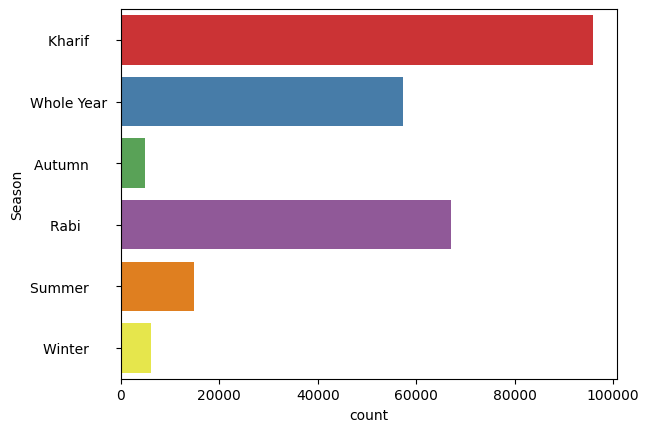

In [7]:
sns.countplot(data=df,y=df['Season'],palette='Set1')
plt.show()

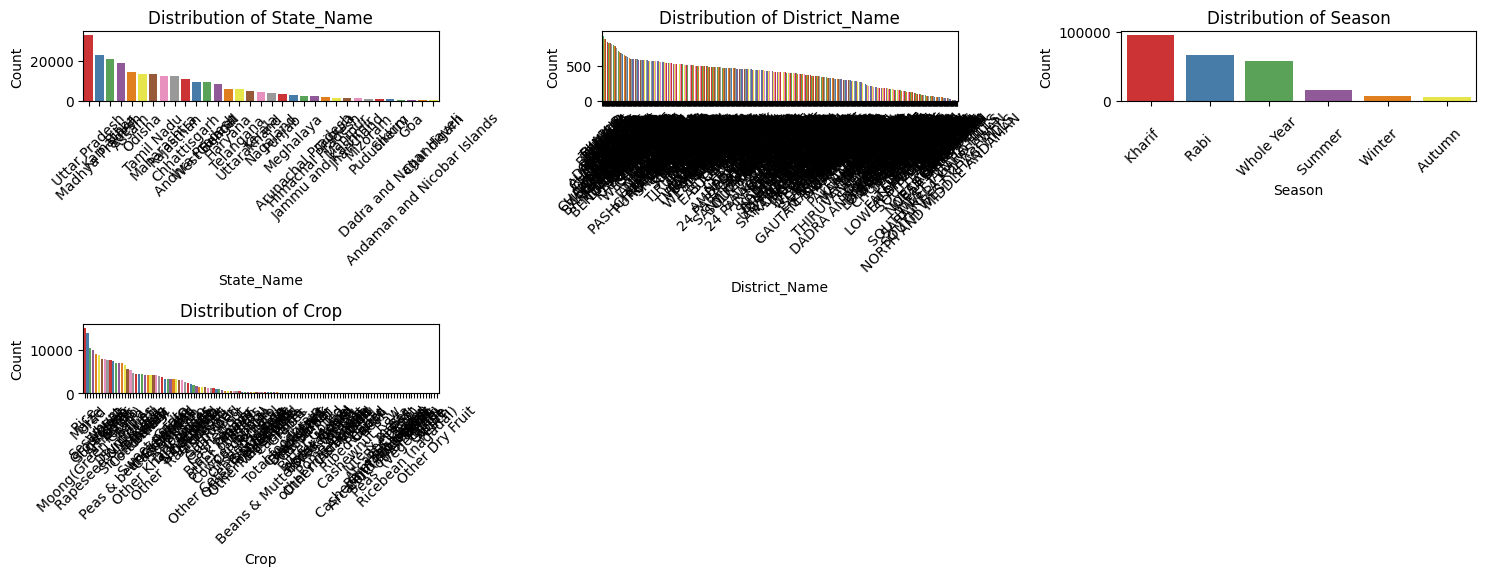

In [8]:
df_cat=df.select_dtypes(include='object')


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for the plots
plt.figure(figsize=(15, 10), facecolor="white")

# Number of subplots
plotnum = 1

# Plot bar plots for each categorical column
for column in df_cat:
    if plotnum <= 12:
        ax = plt.subplot(4, 3, plotnum)
        sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, palette='Set1', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
        plotnum += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

        

### Bivariate Analysis

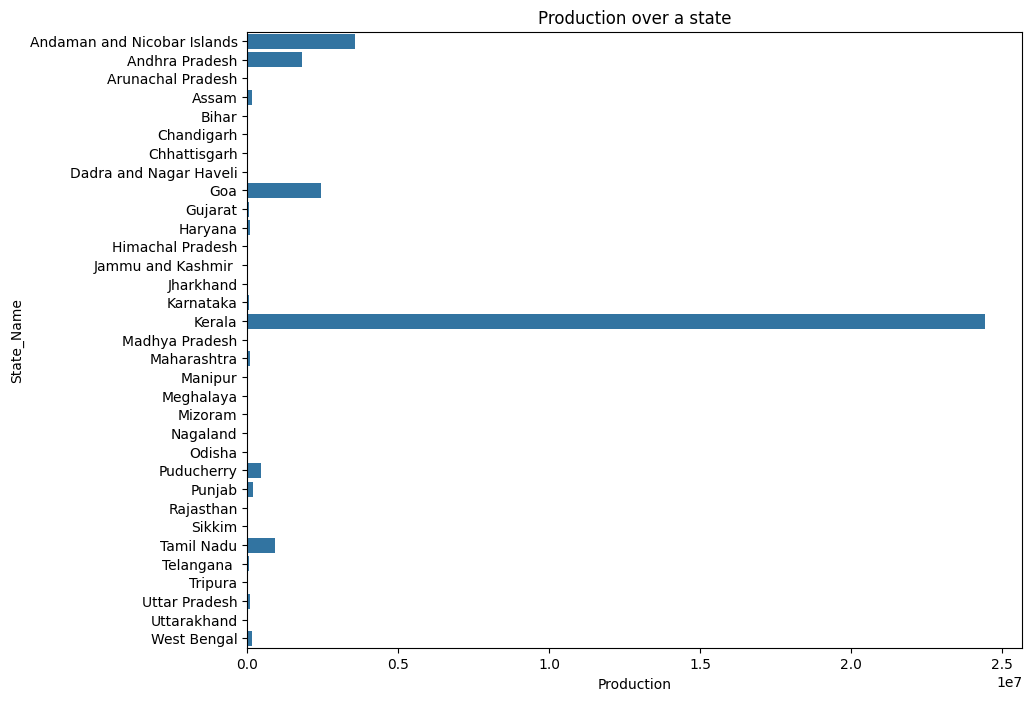

In [9]:
plt.figure(figsize=(10,8), facecolor="white")
ax=sns.barplot(data=df,y='State_Name',x='Production', ci=None)
ax.set_title('Production over a state')
plt.show()

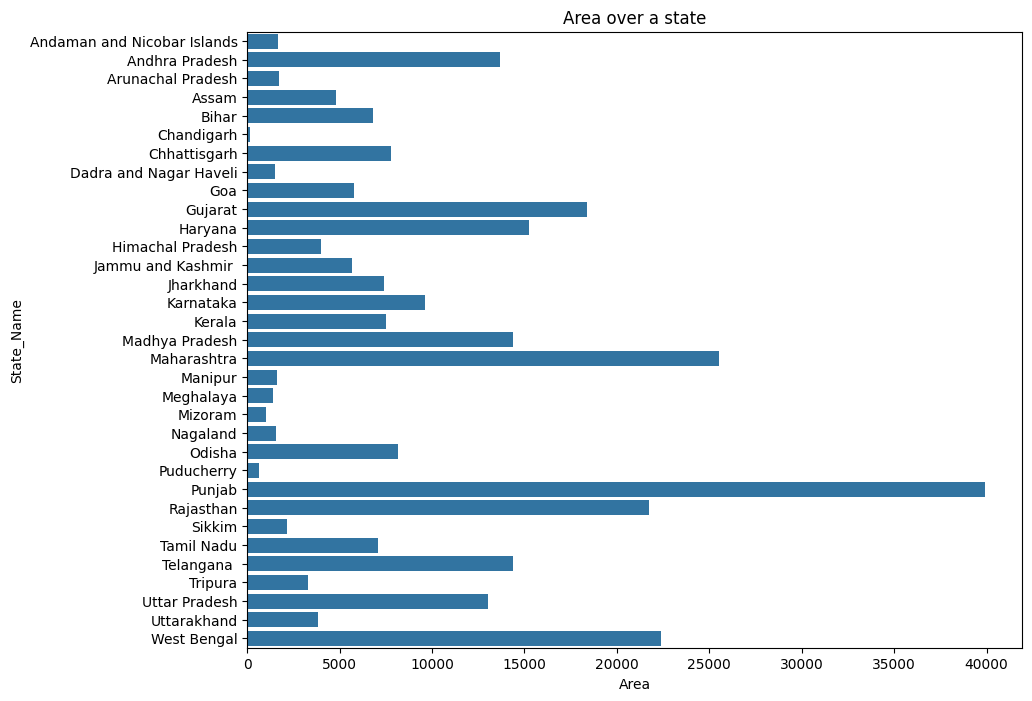

In [10]:
plt.figure(figsize=(10,8), facecolor="white")
ax=sns.barplot(data=df,y='State_Name',x='Area', ci=None)
ax.set_title('Area over a state')
plt.show()

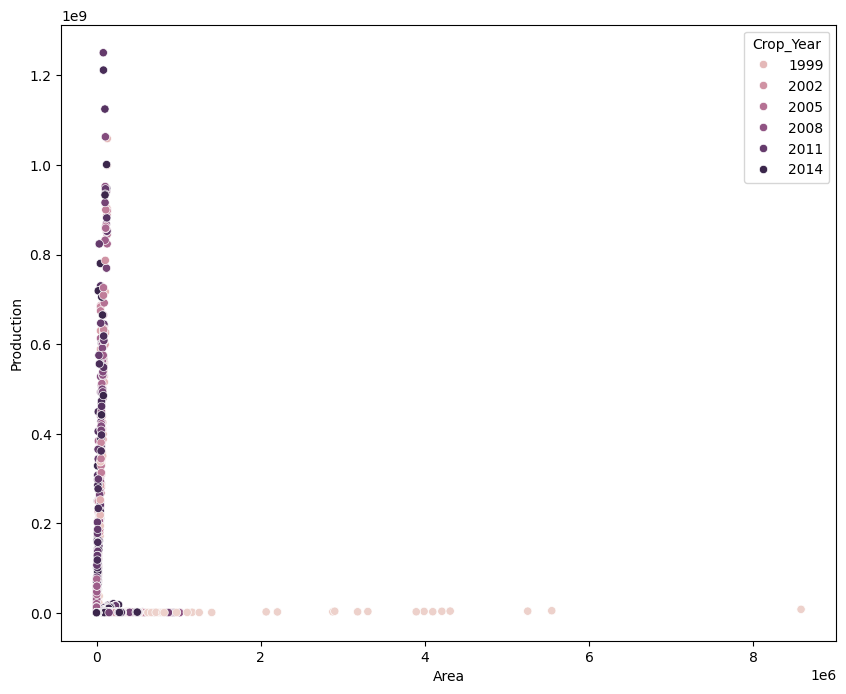

In [11]:
plt.figure(figsize=(10,8), facecolor="white")
sns.scatterplot(data=df,x='Area',y='Production', hue='Crop_Year')
plt.show()

### Insights

- kharif,rabi and whole year are the three high cultivating seasons among the six seasons
- AMong these three seasons Karif is the high productional season
- The top production state is uttar pradesh and top crop is "Rice"

### <font color="green">Data Preprocessing</font>

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df.duplicated().sum()

0

### <font color="green">Outliers Checking</font>

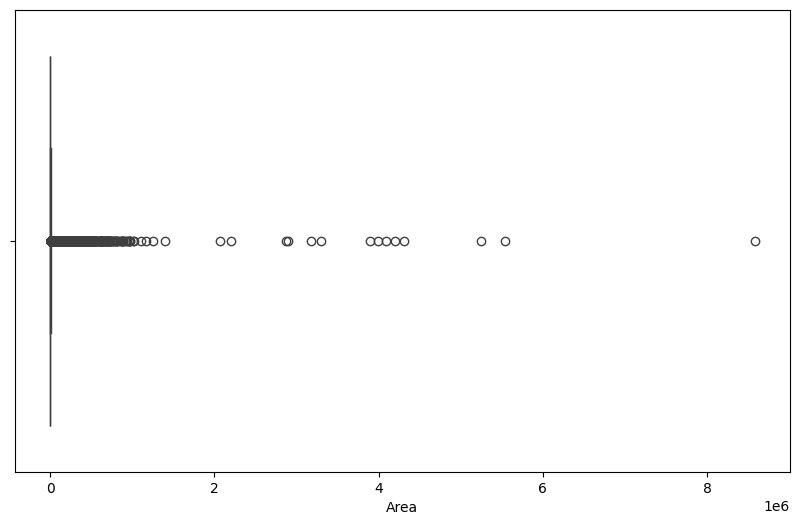

In [8]:
plt.figure(figsize=(10,6), facecolor="white")
sns.boxplot(data=df, x='Area')
plt.show()

<Axes: xlabel='Crop_Year'>

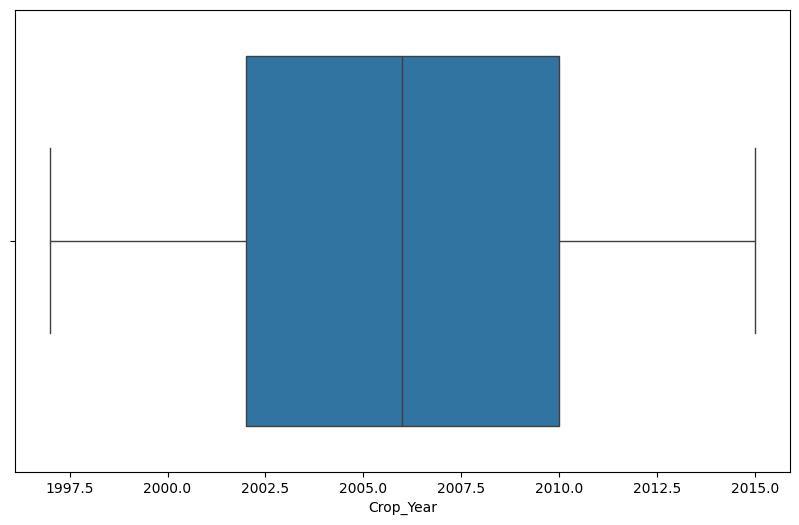

In [9]:
plt.figure(figsize=(10,6), facecolor="white")
sns.boxplot(data=df, x='Crop_Year')

### <font color="green">Outliers Handling</font>

In [10]:
q1=df['Area'].quantile(0.25)
q3=df['Area'].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
high=q3+1.5*iqr
outliers=df.loc[(df['Area']<low)|(df['Area']>high),'Area']

In [11]:
outliers

5          18168.00
14         18190.00
23         18240.00
32         18284.74
41         18394.70
            ...    
246017    288735.00
246033     12986.00
246052    302274.00
246070     11493.00
246089    279151.00
Name: Area, Length: 40705, dtype: float64

In [12]:
num_outliers = outliers.count()
total_entries = df['Area'].count()
outliers_percentage = (num_outliers / total_entries) * 100

In [13]:
outliers_percentage

16.5406292794129

### <font color="green">Handling NAN values</font>

In [14]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [15]:
df.loc[df['Production'].isnull()==True, 'Production'] =df['Production'].median()

In [16]:
df.loc[df['Production'].isnull()==True, 'Production']

Series([], Name: Production, dtype: float64)

### Insights

- Having NAN values in Production column, and imputing the columns with the median value
- outliers exceeds the threshold so Handling them is quite challenging
- there is no duplicated values

### <font color="green">Label Encoding</font>

In [18]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()


In [19]:
columns_to_encode = ['State_Name', 'District_Name', 'Crop', 'Season']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = lc.fit_transform(df[col])

In [20]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


### <font color="green"> Feature Selection</font>

<Axes: >

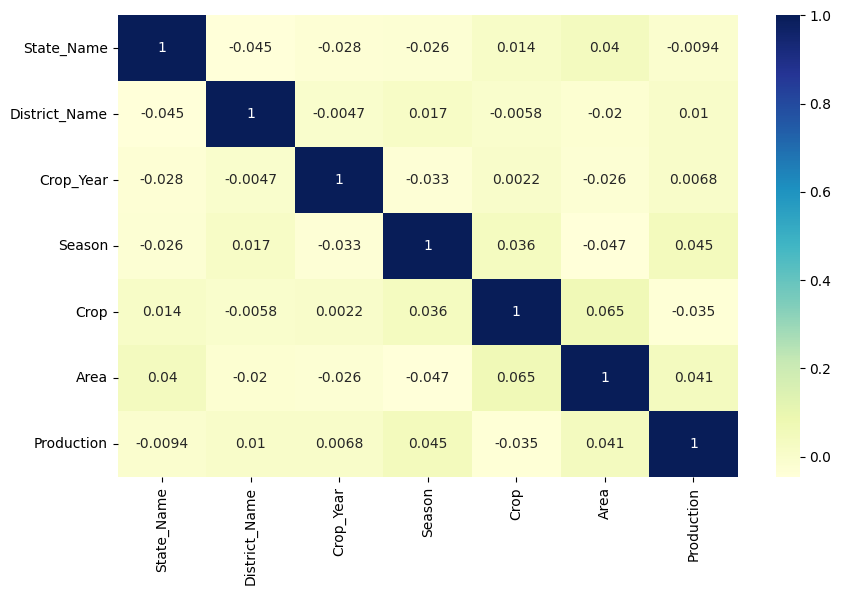

In [21]:
plt.figure(figsize=(10,6), facecolor="white")
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,  cmap='YlGnBu')

### Insights

- No need of Feature selection because except output the column Area is having numbers
- data is non linear
- use tree based algorithm for data modeling


### <font color="green">Model Creation</font>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [33]:
X=df.drop('Production',axis=1)
y=df.Production


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(196872, 6)
(196872,)
(49219, 6)
(49219,)


In [36]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred=model.predict(x_test)
y_pred

array([ 732.171,   71.94 ,  155.17 , ...,   25.05 , 4667.92 ,  146.89 ])

In [38]:
r2_score(y_test,y_pred)


0.814710669194388

In [39]:
mse = mean_squared_error(y_test, y_pred)
mse

29566005617466.15

### <font color="green">Conclusion</font>

- Based on the analysis using Random Forest with 81% accuracy.

 - **Effective Predictive Model**: The Random Forest model effectively predicts crop production based on historical data, achieving a high accuracy rate of 81%.
 - **Insights into Factors**: Features such as area cultivated, crop type, and geographical location (state, district) significantly influence crop production outcomes.
 - **Seasonal and Temporal Patterns**: The model reveals insights into seasonal and temporal trends, helping to understand the dynamics of crop production over time.

### <font color="green">Recommendations</font>

- **Optimization Strategies**: Use the insights to optimize agricultural practices, such as recommending suitable crops for specific seasons or regions.

- **Policy Decisions**: Inform agricultural policies based on predictive insights to enhance crop productivity and sustainability.
  
- **Further Research**: Consider exploring additional factors (e.g., weather conditions, soil quality) to improve model accuracy and broaden insights.